<a href="https://colab.research.google.com/github/HoangQuanHCMUTEK19/ANN-project/blob/main/NhandienKhuonMat1nguoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import math as m


In [ ]:
#get data
with open('data.pickle', 'rb') as f:
    (x_train, y_train) = pickle.load(f)

# Reshape Data
x_pre = x_train[40]
x_pre1 = x_train[0]
x_train = x_train[:194] #299 la 3 anh
y_train = y_train[:194]
y_train




array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)

# Preprocessing Data
x_train = x_train.astype('float32')
x_train /= 255

# Encoding Y
y_train = np_utils.to_categorical(y_train, 2)

# Shuffe Data
x_train, y_train = shuffle(x_train, y_train)

x_train[0]


array([0.7921569 , 0.7921569 , 0.74509805, ..., 0.6666667 , 0.6862745 ,
       0.6784314 ], dtype=float32)

In [ ]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape = (67500,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer =Adam(), metrics=['acc'])
history = model.fit(x_train, y_train, batch_size = 32, epochs = 50, validation_split = 0.2)



Epoch 1/50
2/2 [==============================] - 1s 205ms/step - loss: 0.6932 - acc: 0.5833 - val_loss: 0.6744 - val_acc: 0.7500
Epoch 2/50
2/2 [==============================] - 0s 36ms/step - loss: 0.6759 - acc: 0.6667 - val_loss: 0.6461 - val_acc: 0.7500
Epoch 3/50
2/2 [==============================] - 0s 37ms/step - loss: 0.6214 - acc: 0.8542 - val_loss: 0.5776 - val_acc: 1.0000
Epoch 4/50
2/2 [==============================] - 0s 38ms/step - loss: 0.5761 - acc: 0.9167 - val_loss: 0.6434 - val_acc: 0.7500
Epoch 5/50
2/2 [==============================] - 0s 35ms/step - loss: 0.5636 - acc: 0.8333 - val_loss: 0.5145 - val_acc: 1.0000
Epoch 6/50
2/2 [==============================] - 0s 33ms/step - loss: 0.5156 - acc: 0.9583 - val_loss: 0.4924 - val_acc: 0.9167
Epoch 7/50
2/2 [==============================] - 0s 34ms/step - loss: 0.4563 - acc: 0.9583 - val_loss: 0.5164 - val_acc: 0.8333
Epoch 8/50
2/2 [==============================] - 0s 36ms/step - loss: 0.4042 - acc: 0.9375 - va

(150, 150, 3)


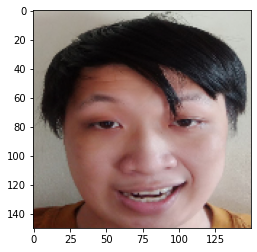

In [ ]:
# Load Test Image
plt.imshow(cv2.cvtColor(x_pre, cv2.COLOR_BGR2RGB))
print(x_pre.shape)
img = x_pre.reshape(1,-1)
img = img.astype('float32')
img /= 255
img1 = x_pre1.reshape(1,-1)
img1 = img1.astype('float32')
img1 /= 255


1
Day la Quan


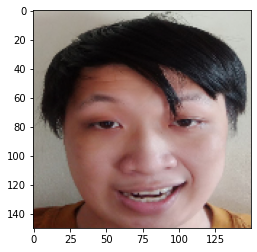

In [ ]:
#nhận dạng
k = np.argmax(model.predict(img))
print(k)
if k ==0:
  print('Khong phai Quan')
if k == 1:
 print('Day la Quan')

plt.imshow(cv2.cvtColor(x_pre, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))


0
Khong phai Quan


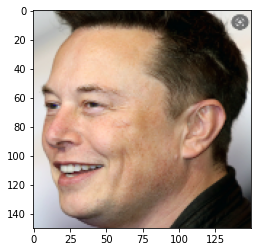

In [ ]:
k1 = np.argmax(model.predict(img1))
print(k1)
if k1 ==0:
  print('Khong phai Quan')
if k1 == 1:
 print('Day la Quan')

plt.imshow(cv2.cvtColor(x_pre1, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))